# LIBRAIRIES

In [33]:
import datetime
import re
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException

from bs4 import BeautifulSoup
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import unidecode

In [34]:
df_salary=pd.read_csv("/Users/fabi/Documents/Data AI Ecouen/PROJECTS/salary_indeed.csv")

In [ ]:
df_salary.shape

In [ ]:
df_salary.head()

# MACHINE LEARNING

##### ML

- STEP 1:
    * tester modèles classiques :
        * regression logistique (Ivan) SVM linear (Ivan)
        * SVM kernel (Ivan)
    * tester modèles de boost random forest (Ivan)
        * adaboost xgboost

- STEP 2 :
    * revoir les features X, et vérifier si amélioration de l'accuracy
    * faire grid search (tester au sein d'un mm modèle différents paramètres) (Ivan)

PREDICTIONS
    - CDI/CDD --> ANNUEL
    - STAGE --> MENSUEL
    - FREELANCE  --> HEBDOMADAIRE (conversion salaire journalier et horaire en hebdomadaire)

### CLASSIC MODELS

#### Régression logistique

#### SVM linear

#### SVM kernel

### BOOSTING MODELS

#### Adaboost

#### Xgboost

### For ** Model

## Quantiles salary min annually

In [25]:
df_annually.salary_min.describe()

count      675.000000
mean     40998.761481
std      10930.715767
min      20000.000000
25%      33000.000000
50%      40000.000000
75%      47500.000000
max      90000.000000
Name: salary_min, dtype: float64

## Quantiles salary max annually

In [26]:
df_annually.salary_max.describe()

count       675.000000
mean      49769.296296
std       13259.715155
min       20388.000000
25%       40000.000000
50%       50000.000000
75%       55000.000000
max      120000.000000
Name: salary_max, dtype: float64

## Quantiles salary mean annually

In [27]:
df_annually.salary_mean.describe()

count       675.000000
mean      45384.028889
std       11569.392983
min       20388.000000
25%       37500.000000
50%       45000.000000
75%       51250.000000
max      100000.000000
Name: salary_mean, dtype: float64

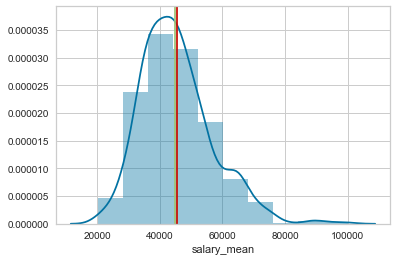

In [144]:
import seaborn as sns

ax = sns.distplot(df_annually.salary_mean, bins=10)
ax.axvline(df_annually.salary_mean.mean(), c='r')
ax.axvline(df_annually.salary_mean.median(), c='g')

In [351]:
df_annually.salary_mean.describe(percentiles=[0.15,0.85])

count       675.000000
mean      45384.028889
std       11569.392983
min       20388.000000
15%       35000.000000
50%       45000.000000
85%       55000.000000
max      100000.000000
Name: salary_mean, dtype: float64

## Création quartiles de chaque df

In [28]:
annually_quantiles=df_annually.salary_mean.describe()
monthly_quantiles=df_monthly.salary_mean.describe() 
weekly_quantiles=df_weekly.salary_mean.describe()
hour_quantiles=df_hour.salary_mean.describe()

# Création colonne class label par rapport aux quartiles salary mean

In [198]:
def classification_annually(x):
    if x <= annually_quantiles["25%"]:
        label = 0
    elif x > annually_quantiles["25%"] and x <= annually_quantiles["50%"]:
        label = 1
    elif x > annually_quantiles["50%"] and x <= annually_quantiles["75%"]:
        label = 2
    else:
        label = 3
        
    return label

df_annually["salary_label_quartiles"] = df_annually.salary_mean.apply(classification_annually)

# Création colonnes class salary par percentiles donnés

In [352]:
def classification_percentile(x):
    percentiles = df_annually.salary_mean.describe(percentiles=[0.15,0.85])
    if x <= percentiles["15%"]:
        label = 0
    elif x <= percentiles["85%"]:
        label = 1
    else:
        label = 2
        
    return label

df_annually["salary_label_percentile"] = df_annually.salary_mean.apply(classification_percentile)       

# Création labels avec K-means

In [30]:
data = df_annually.salary_mean
#data.values.reshape(-1,1)

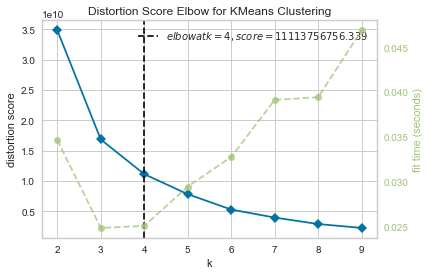

In [31]:
model= KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data.values.reshape(-1,1))
visualizer.poof()

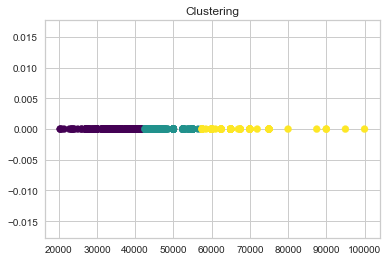

In [32]:
label_3_mean = KMeans(n_clusters=3).fit_predict(data.values.reshape(-1,1))
plt.title('Clustering')
plt.scatter(data, np.zeros_like(data), c=label_3_mean, cmap='viridis')
plt.show()

In [33]:
df_annually["label_3_mean"]= pd.Series(label_3_mean)

In [34]:
data2 = df_annually[['salary_min','salary_max']]

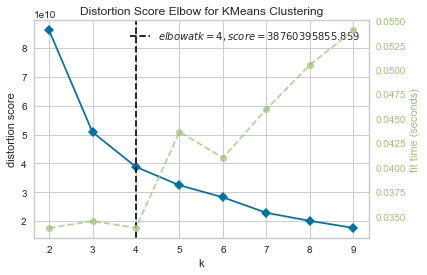

In [35]:
model= KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data2)
visualizer.poof()

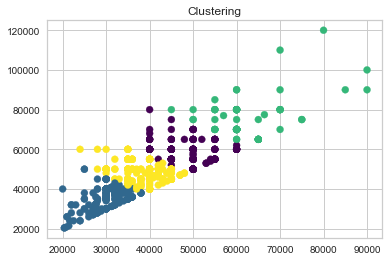

In [414]:
clusters = KMeans(n_clusters=4).fit_predict(data.values.reshape(-1,1))
plt.title('Clustering')
plt.scatter(data2['salary_min'], data2['salary_max'], c=clusters, cmap='viridis')
plt.show()

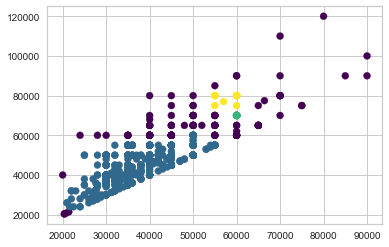

535
535
[-1  0  1  2]


In [29]:
#d = StandardScaler().fit_transform(data2)

db = DBSCAN(eps=4900, min_samples=15).fit(data2)
labels = db.labels_

plt.scatter(data2['salary_min'], data2['salary_max'], c=labels, cmap='viridis')
plt.show()

print(len(db.core_sample_indices_ ))
print(len(db.components_))
print(np.unique(db.labels_))

In [415]:
df_annually["label_min_max"]= pd.Series(clusters)
df_annually

,_id,Title,Company,Location,Salary,Description,Date,Job_Search,Department_Search,city,cp,salary_min,salary_max,salary_type,salary_mean,salary_label_quartiles,label_3_mean,label_min_max,salary_label_tertiles,salary_label_percentile
0,p_008d77a008590232,INGÉNIEUR DÉVELOPPEUR C++ / JAVA F/H,ALTEN,Toulouse (31),30 000 € - 45 000 € par an,Partenaire technologique de référence des plus...,08/09/2019,Développeur,Haute-Garonne,Toulouse,31,30000.0,45000.0,annually,37500.0,0,0,1,1,1
1,p_00f2ad8db3c30b8e,Devops F/H,Kent FR,Bordeaux (33),35 000 € - 40 000 € par an,"KENT, marque de GroupAgora dédiée aux recrutem...",09/03/2019,Développeur,Gironde,Bordeaux,33,35000.0,40000.0,annually,37500.0,0,0,1,1,1
2,p_00fa03a21ad52a71,Data Scientist H/F,QYSY,Paris (75),40 000 € - 65 000 € par an,QYSY est un cabinet de conseil et de recruteme...,29/09/2019,Data,75,Paris,75,40000.0,65000.0,annually,52500.0,3,1,0,3,1
3,p_0130bef769eef3cc,BUSINESS DEVELOPER BTOB - DATA INTELLIGENCE (H/F),L.I.P,Lyon 3e (69),35 000 € - 60 000 € par an,69003 - Lyon-3e-Arrondissement CDI Bac+5 et pl...,07/10/2019,Data,Rhône,Lyon,69,35000.0,60000.0,annually,47500.0,2,1,3,2,1
4,p_019d01b7494dc632,Référent fonctionnel et données - Data manager...,GARCIN FINANCES ET PARTICIPATIONS,Corbas (69),40 000 € - 45 000 € par an,Vous souhaitez participer à la structuration d...,10/09/2019,Data,Rhône,Corbas,69,40000.0,45000.0,annually,42500.0,1,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,pj_f74c94c78f09bd8e,Senior Data Scientist,Pivot & Co,Paris 8e (75),60 000 € par an,"Areas: Data Science, Media Effectiveness, ROI,...",05/10/2019,Data,75,Paris,75,60000.0,60000.0,annually,60000.0,3,2,0,3,2
671,pj_f9b2d5fe629ccfb3,DevOps (H/F),EASY PARTNER,Paris (75),50 000 € - 55 000 € par an,### LE POSTE Afin d’accompagner sa forte croi...,08/10/2019,Développeur,75,Paris,75,50000.0,55000.0,annually,52500.0,3,1,0,3,1
672,pj_fd8e78ca8bedfe98,Web Developpeur,CLERE / JES,Loire-Atlantique,22 000 € - 28 000 € par an,"Éditeur de logiciels, nous développons en inte...",NaN,Développeur,Loire-Atlantique,Loire-Atlantique,None,22000.0,28000.0,annually,25000.0,0,0,1,1,0
673,pj_fe470d6a829fdecc,Consultant Devops - H/F,Des Systèmes et des Hommes,Paris 9e (75),45 000 € par an,Docker / Hibernate / Linux / Jenkins / Oracle-...,NaN,Développeur,75,Paris,75,45000.0,45000.0,annually,45000.0,1,1,3,2,1


# Création colonne class label par rapport aux tertiles salary mean

In [38]:
tercile_1 = np.quantile(df_annually.salary_mean, 1/3)
tercile_1

40000.0

In [39]:
tercile_2 = np.quantile(df_annually.salary_mean, 2/3)
tercile_2

48000.0

In [71]:
#print(df_annually[df_annually.label_3_mean == 0].shape)
print(df_annually[df_annually.salary_mean <40000].shape)
print(df_annually[(df_annually.salary_mean >= 40000) & (df_annually.salary_mean < 48000)].shape)
print(df_annually[df_annually.salary_mean >= 48000].shape)
#print(df_annually[df_annually.label_3_mean == 1].shape)
#print(df_annually[df_annually.label_3_mean == 2].shape)

(211, 18)
(238, 18)
(226, 18)


In [72]:
df_annually.salary_mean.describe(percentiles=[1/3,2/3])

count       675.000000
mean      45384.028889
std       11569.392983
min       20388.000000
33.3%     40000.000000
50%       45000.000000
66.7%     48000.000000
max      100000.000000
Name: salary_mean, dtype: float64

In [602]:
def classification_tertile(x):
    if x <= tercile_1:
        label = 1
    elif x <= tercile_2:
        label = 2
    else:
        label = 3
    return label

df_annually["salary_label_tertiles"] = df_annually["salary_mean"].apply(classification_tertile)

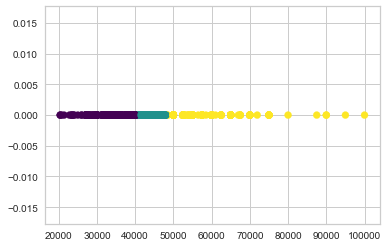

In [603]:
plt.scatter(data, np.zeros_like(data), c=df_annually.salary_label_tertiles, cmap='viridis')
plt.show()

In [75]:
df_annually

,_id,Title,Company,Location,Salary,Description,Date,Job_Search,Department_Search,city,cp,salary_min,salary_max,salary_type,salary_mean,salary_label_quartiles,label_3_mean,label_min_max,salary_label_tertiles
0,p_008d77a008590232,INGÉNIEUR DÉVELOPPEUR C++ / JAVA F/H,ALTEN,Toulouse (31),30 000 € - 45 000 € par an,Partenaire technologique de référence des plus...,08/09/2019,Développeur,Haute-Garonne,Toulouse,31,30000.0,45000.0,annually,37500.0,0,0,1,1
1,p_00f2ad8db3c30b8e,Devops F/H,Kent FR,Bordeaux (33),35 000 € - 40 000 € par an,"KENT, marque de GroupAgora dédiée aux recrutem...",09/03/2019,Développeur,Gironde,Bordeaux,33,35000.0,40000.0,annually,37500.0,0,0,1,1
2,p_00fa03a21ad52a71,Data Scientist H/F,QYSY,Paris (75),40 000 € - 65 000 € par an,QYSY est un cabinet de conseil et de recruteme...,29/09/2019,Data,75,Paris,75,40000.0,65000.0,annually,52500.0,3,1,0,3
3,p_0130bef769eef3cc,BUSINESS DEVELOPER BTOB - DATA INTELLIGENCE (H/F),L.I.P,Lyon 3e (69),35 000 € - 60 000 € par an,69003 - Lyon-3e-Arrondissement CDI Bac+5 et pl...,07/10/2019,Data,Rhône,Lyon,69,35000.0,60000.0,annually,47500.0,2,1,0,2
4,p_019d01b7494dc632,Référent fonctionnel et données - Data manager...,GARCIN FINANCES ET PARTICIPATIONS,Corbas (69),40 000 € - 45 000 € par an,Vous souhaitez participer à la structuration d...,10/09/2019,Data,Rhône,Corbas,69,40000.0,45000.0,annually,42500.0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,pj_f74c94c78f09bd8e,Senior Data Scientist,Pivot & Co,Paris 8e (75),60 000 € par an,"Areas: Data Science, Media Effectiveness, ROI,...",05/10/2019,Data,75,Paris,75,60000.0,60000.0,annually,60000.0,3,2,2,3
671,pj_f9b2d5fe629ccfb3,DevOps (H/F),EASY PARTNER,Paris (75),50 000 € - 55 000 € par an,### LE POSTE Afin d’accompagner sa forte croi...,08/10/2019,Développeur,75,Paris,75,50000.0,55000.0,annually,52500.0,3,1,0,3
672,pj_fd8e78ca8bedfe98,Web Developpeur,CLERE / JES,Loire-Atlantique,22 000 € - 28 000 € par an,"Éditeur de logiciels, nous développons en inte...",NaN,Développeur,Loire-Atlantique,Loire-Atlantique,None,22000.0,28000.0,annually,25000.0,0,0,1,1
673,pj_fe470d6a829fdecc,Consultant Devops - H/F,Des Systèmes et des Hommes,Paris 9e (75),45 000 € par an,Docker / Hibernate / Linux / Jenkins / Oracle-...,NaN,Développeur,75,Paris,75,45000.0,45000.0,annually,45000.0,1,1,0,2


In [76]:
#stopwords
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')

# Prediction salaire avec job desc brut seulement

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

- Choix du X_desc en le nettoyant pour ne pas avoir les infos salaire et choix du y

In [604]:
X_desc = df_annually.Description.str.replace("\n"," ").str.replace(r'\b\d\d\W?\d\d\d\b\W?(\d\d)?','').str.replace(r'\+',' plus ').str.replace(r'\b\d\W?\d\d\d\W?(\d\d)?\b','').str.replace(r'\b\d\d\W\d\d[kK]?\b','').str.replace(r'\b\d\d[kK]\W?','')
y = df_annually.salary_label_tertiles # <- à changer à chaque fois qu'on veut relancer avec différent y_label

- choix des stopwords à utliser avec CountVectorizer

In [605]:
#stop_words_en.remove('an') #  <- décocher si jamais run
stop_words_en_fr = stop_words_en + stop_words_fr + ["h","f", "mois", "ci", "e", "salaire", "avoir", "offres", "description", "emploi", "véritables", "recherche", "travail", "intégrer", "suivantes", "cette", "recherchons", "travailler", "définir", "similaire", "aujourd'hui"]

- Utilisation de CountVectorizer

In [606]:
cv = CountVectorizer(token_pattern = r'\b\w+\b',stop_words=stop_words_en_fr,  ngram_range=(1, 3), min_df = 2)
cv.fit(X_desc)

/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aujourd', 'hui'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=2,
                ngram_range=(1, 3), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='\\b\\w+\\b', tokenizer=None,
                vocabulary=None)

In [607]:
len(cv.get_feature_names())

40957

In [608]:
X_desc_trans = cv.transform(X_desc)
#X_desc_trans = pd.DataFrame(cv.transform(X_desc).todense(), columns=cv.get_feature_names())
#X_desc_trans

In [609]:
#word_counts = X_desc_trans.sum(axis=0)
#word_counts.sort_values(ascending = False).head(20)

- Prédiction avec RandomForestClassifier

In [610]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_desc_trans, y, test_size=0.3, random_state=0, stratify=y)


rfc = RandomForestClassifier(300, random_state=0)

n_estimators = [200, 250, 300, 350, 400]
criterion = ["gini", "entropy"]
#max_depth = [X.shape[1]*0.01, X.shape[1]*0.03, X.shape[1]*0.05, X.shape[1]*0.07, X.shape[1]*0.09]

param_grid = {'n_estimators': n_estimators, "criterion" : criterion}
grid = GridSearchCV(rfc, param_grid =param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )



#rfc.score(X_test,y_test)

/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are {'criterion': 'entropy', 'n_estimators': 200} with a score of 64
Best estimator accuracy on test set 69.46 


In [611]:
rfc.fit(X_train, y_train)

rfc.score(X_test,y_test)

0.7044334975369458

In [612]:
grid.best_estimator_.score(X_train, y_train)*100

100.0

In [613]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.736179,0.033875,0.077815,0.005263,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.687500,0.642105,0.595745,0.563830,0.580645,0.614407,0.045215,10
1,2.198586,0.019027,0.092013,0.002596,gini,250,"{'criterion': 'gini', 'n_estimators': 250}",0.697917,0.631579,0.606383,0.574468,0.591398,0.620763,0.043269,8
2,2.642488,0.010726,0.113849,0.005037,gini,300,"{'criterion': 'gini', 'n_estimators': 300}",0.697917,0.642105,0.606383,0.585106,0.591398,0.625000,0.041818,4
3,3.030304,0.017297,0.127492,0.005587,gini,350,"{'criterion': 'gini', 'n_estimators': 350}",0.697917,0.642105,0.606383,0.574468,0.591398,0.622881,0.043998,5
4,3.476387,0.043501,0.144912,0.006828,gini,400,"{'criterion': 'gini', 'n_estimators': 400}",0.687500,0.642105,0.617021,0.563830,0.602151,0.622881,0.041348,5
5,1.815486,0.020368,0.072999,0.002843,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.708333,0.652632,0.595745,0.617021,0.602151,0.635593,0.041712,1
6,2.324375,0.036132,0.095530,0.009096,entropy,250,"{'criterion': 'entropy', 'n_estimators': 250}",0.708333,0.642105,0.595745,0.606383,0.591398,0.629237,0.043764,2
7,2.832913,0.019084,0.111042,0.004281,entropy,300,"{'criterion': 'entropy', 'n_estimators': 300}",0.718750,0.642105,0.595745,0.595745,0.591398,0.629237,0.048907,2
8,3.196128,0.051041,0.126314,0.012093,entropy,350,"{'criterion': 'entropy', 'n_estimators': 350}",0.708333,0.642105,0.574468,0.595745,0.591398,0.622881,0.048665,5
9,3.184965,0.231568,0.104586,0.009174,entropy,400,"{'criterion': 'entropy', 'n_estimators': 400}",0.708333,0.642105,0.585106,0.574468,0.591398,0.620763,0.050013,8


In [614]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = cv.get_feature_names()).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_importances.sort_values('importance', ascending=False).head(50)

,feature,importance
18576,informatique,0.005080
13171,développeur,0.004951
25491,paris,0.004745
18804,infrastructure,0.004235
40337,équipes,0.003377
27229,plus 2,0.002929
10795,devops,0.002819
4587,aws,0.002681
10168,data,0.002392
26,1 an,0.002226


In [615]:
#list(X_desc[X_desc.str.contains("10 ans")])

# Prédiction salaire avec Title seulement

In [616]:
X_title = df_annually.Title.str.replace("\n"," ").str.replace("/"," ")

In [617]:
cv2 = CountVectorizer( token_pattern=r'\b[^\d\W]+\b', stop_words=stop_words_en_fr, ngram_range=(1, 2))
cv2.fit(X_title)

/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aujourd', 'hui'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='\\b[^\\d\\W]+\\b',
                tokenizer=None, vocabulary=None)

In [618]:
len(cv2.get_feature_names())

1282

In [619]:
X_title_trans = cv2.transform(X_title)
#X_title_trans = pd.DataFrame(cv2.transform(X_title).todense(), columns=cv2.get_feature_names())
#X_title_trans

In [620]:
#word_counts2 = X_title_trans.sum(axis=0)
#word_counts2.sort_values(ascending = False).head(30)

In [621]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_title_trans, y, test_size=0.3, random_state=10, stratify=y)


rfc = RandomForestClassifier(50, random_state=0)

n_estimators = [25, 50, 75, 100, 300]
criterion = ["gini", "entropy"]
#max_depth = [X.shape[1]*0.01, X.shape[1]*0.03, X.shape[1]*0.05, X.shape[1]*0.07, X.shape[1]*0.09]

param_grid = {'n_estimators': n_estimators, "criterion" : criterion}
grid = GridSearchCV(rfc, param_grid =param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid.fit(X_train2, y_train2)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test2, y_test2) * 100 ) )


/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are {'criterion': 'entropy', 'n_estimators': 300} with a score of 60
Best estimator accuracy on test set 55.67 


In [622]:
rfc.fit(X_train2, y_train2)

rfc.score(X_test2,y_test2)

0.5665024630541872

In [623]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = cv2.get_feature_names()).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_importances.sort_values('importance', ascending=False).head(30)

,feature,importance
358,développeur,0.043084
286,devops,0.025205
207,data,0.023140
755,lead,0.017188
1059,senior,0.015208
744,junior,0.013559
657,ingénieur,0.012977
698,java,0.012010
150,cdi,0.010602
622,informatique,0.010335


# Prédiction salaire avec ville

In [624]:
df_annually.city.unique()

array(['Toulouse ', 'Bordeaux ', 'Paris', 'Lyon', 'Corbas ', 'Nantes ',
       'Pessac ', 'Limonest ', 'Portet-sur-Garonne ', 'Blagnac ',
       'Talence ', 'Villeneuve-lès-Bouloc ', 'Mérignac ', 'Marennes ',
       'Rillieux-la-Pape ', 'Canéjan ', 'Beauzelle ',
       "Saint-Didier-au-Mont-d'Or ", 'Villeurbanne ', 'Lissieu ',
       'Gradignan ', 'Treillières ', 'Loire-Atlantique', 'Limas ',
       'Rhône', 'Labège ', 'Saint-Pierre-de-Chandieu ', 'Saint-Nazaire ',
       'Ancenis ', 'Vénissieux ', 'Chassieu ', 'Dardilly ',
       'Saint-Orens-de-Gameville ', 'Bruges ', 'Brignais ',
       'Saint-Herblain ', 'Châteaubriant ', 'Francheville ', 'Bron ',
       'Carquefou ', 'Toussieu ', 'Charbonnières-les-Bains ',
       'Saint-Médard-en-Jalles ', 'Le Haillan ', 'Castanet-Tolosan ',
       "L'Union ", 'Tassin-la-Demi-Lune ', 'Écully '], dtype=object)

In [625]:
city_d = pd.get_dummies(df_annually.city)
X_city = city_d

X_train, X_test, y_train, y_test = train_test_split(X_city, y, test_size=0.3, random_state=0, stratify=y)

In [626]:
rfc = RandomForestClassifier(300, random_state=0)

n_estimators = [75, 100, 200, 300, 400]
criterion = ["gini", "entropy"]
#max_depth = [X.shape[1]*0.01, X.shape[1]*0.03, X.shape[1]*0.05, X.shape[1]*0.07, X.shape[1]*0.09]

param_grid = {'n_estimators': n_estimators, "criterion" : criterion}
grid = GridSearchCV(rfc, param_grid =param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'criterion': 'gini', 'n_estimators': 75} with a score of 60
Best estimator accuracy on test set 59.61 


In [627]:
rfc.fit(X_train, y_train)

rfc.score(X_test,y_test)

0.5960591133004927

In [628]:
X_city.columns

Index(['Ancenis ', 'Beauzelle ', 'Blagnac ', 'Bordeaux ', 'Brignais ', 'Bron ',
       'Bruges ', 'Canéjan ', 'Carquefou ', 'Castanet-Tolosan ',
       'Charbonnières-les-Bains ', 'Chassieu ', 'Châteaubriant ', 'Corbas ',
       'Dardilly ', 'Francheville ', 'Gradignan ', 'L'Union ', 'Labège ',
       'Le Haillan ', 'Limas ', 'Limonest ', 'Lissieu ', 'Loire-Atlantique',
       'Lyon', 'Marennes ', 'Mérignac ', 'Nantes ', 'Paris', 'Pessac ',
       'Portet-sur-Garonne ', 'Rhône', 'Rillieux-la-Pape ',
       'Saint-Didier-au-Mont-d'Or ', 'Saint-Herblain ',
       'Saint-Médard-en-Jalles ', 'Saint-Nazaire ',
       'Saint-Orens-de-Gameville ', 'Saint-Pierre-de-Chandieu ', 'Talence ',
       'Tassin-la-Demi-Lune ', 'Toulouse ', 'Toussieu ', 'Treillières ',
       'Villeneuve-lès-Bouloc ', 'Villeurbanne ', 'Vénissieux ', 'Écully '],
      dtype='object')

In [629]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_city.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_importances.sort_values('importance', ascending=False)

,feature,importance
28,Paris,0.518922
27,Nantes,0.075735
24,Lyon,0.071950
41,Toulouse,0.065383
3,Bordeaux,0.035369
40,Tassin-la-Demi-Lune,0.022260
23,Loire-Atlantique,0.017247
21,Limonest,0.015264
8,Carquefou,0.013307
25,Marennes,0.012682


In [630]:
#n_estimators = np.linspace(start = 600 , stop = 1000, num = 8, dtype= int )
#n_estimators
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

param_grid = {'n_estimators': n_estimators}
grid = GridSearchCV(rfc, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'n_estimators': 100} with a score of 60
Best estimator accuracy on test set 59.61 


In [631]:
df_annually.Department_Search.unique()

array(['Haute-Garonne', 'Gironde', '75', 'Rhône', 'Loire-Atlantique'],
      dtype=object)

In [632]:
depart_d = pd.get_dummies(df_annually.Department_Search)
X_depart = depart_d

X_train, X_test, y_train, y_test = train_test_split(X_depart, y, test_size=0.3, random_state=0, stratify=y)

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

param_grid = {'n_estimators': n_estimators}
grid = GridSearchCV(rfc, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'n_estimators': 50} with a score of 61
Best estimator accuracy on test set 60.10 


In [633]:
rfc = RandomForestClassifier(50, random_state=0)
rfc.fit(X_train, y_train)

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_depart.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_importances.sort_values('importance', ascending=False)

,feature,importance
0,75,0.597498
4,Rhône,0.159060
2,Haute-Garonne,0.113694
3,Loire-Atlantique,0.091869
1,Gironde,0.037879


In [673]:
df_annually.to_csv("df_annually.csv")

# Fonction plot confusion matrix

In [635]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
 #                     title='Normalized confusion matrix')

#plt.show()

# Prediction avec les X_desc_trans, X_title_trans et X_city

- Feature types

In [636]:
print(type(X_desc_trans))
print(type(X_title_trans))
print(type(X_city))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.frame.DataFrame'>


- On convertit X_desc_trans et X_title_trans en DF pour pouvoir les concatener

In [637]:
X_desc_df = pd.DataFrame(X_desc_trans.todense(), columns=cv.get_feature_names())
X_title_df = pd.DataFrame(X_title_trans.todense(), columns=cv2.get_feature_names())
X_city_df = X_city.reset_index(drop = True)

In [638]:
X = pd.concat([X_desc_df, X_title_df, X_city_df], axis=1)

In [639]:
X_city

,Ancenis,Beauzelle,Blagnac,Bordeaux,Brignais,Bron,Bruges,Canéjan,Carquefou,Castanet-Tolosan,...,Saint-Pierre-de-Chandieu,Talence,Tassin-la-Demi-Lune,Toulouse,Toussieu,Treillières,Villeneuve-lès-Bouloc,Villeurbanne,Vénissieux,Écully
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [640]:
X

,0,0 2,0 2 ans,000,000 inscrits,000 inscrits plus,000 iziworkers,000 iziworkers inscrits,000 professionnels,000 professionnels 90,...,Saint-Pierre-de-Chandieu,Talence,Tassin-la-Demi-Lune,Toulouse,Toussieu,Treillières,Villeneuve-lès-Bouloc,Villeurbanne,Vénissieux,Écully
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - Application du PCA

In [641]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

pca = PCA(.95)
pca.fit(X_train)
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

print ("On est passé de {} colonnes à {} colonnes".format(X.shape[1],len(pca.explained_variance_ratio_)))

On est passé de 42287 colonnes à 341 colonnes


- Logistic sans PCA

In [642]:
logistic = LogisticRegression(random_state =0)
logistic.fit(X_train, y_train)
print("L'accuracy est de {:.2f} %".format(logistic.score(X_test,y_test)*100))

/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


L'accuracy est de 67.98 %


In [643]:
logistic.score(X_train, y_train) * 100

100.0

Confusion matrix, without normalization
[[64  9  8]
 [18 26 11]
 [ 8 11 48]]


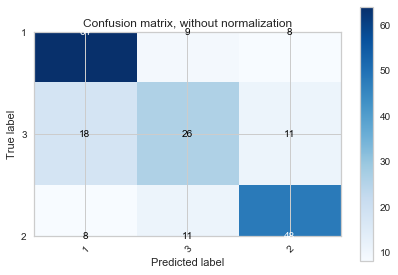

In [644]:
y_pred=logistic.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=y,
                      title='Confusion matrix, without normalization')
plt.show()

In [645]:
feature_importances = pd.DataFrame(logistic.coef_[0],
                                   index = X_train.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_importances.sort_values('importance', ascending=False).head(50)

,feature,importance
18576,informatique,0.517489
42266,Nantes,0.449410
23813,nantes,0.293227
32288,réaliser,0.263359
13171,développeur,0.253256
26707,php,0.252583
30685,r,0.252422
191,2,0.234988
23039,mobile,0.234635
41701,junior,0.231753


- logistic avec PCA

In [646]:
logistic.fit(x_train_pca, y_train)
print("L'accuracy est de {:.2f} %".format(logistic.score(x_test_pca,y_test)*100))

L'accuracy est de 70.94 %


/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [647]:
logistic.score(x_train_pca, y_train) * 100

99.57627118644068

- SVM grid search sans PCA

In [648]:
kernel = ["linear", "poly", "rbf","sigmoid"]

svc=SVC(gamma='auto')

param_grid = {'kernel': kernel}
grid = GridSearchCV(svc, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

/Users/Ivan/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best parameters are {'kernel': 'linear'} with a score of 62
Best estimator accuracy on test set 67.00 


In [649]:
grid.best_estimator_.score(X_train, y_train)*100

100.0

Confusion matrix, without normalization
[[63 11  7]
 [20 25 10]
 [ 8 11 48]]


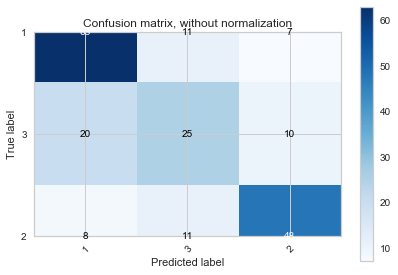

In [650]:
y_pred=grid.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=y,
                      title='Confusion matrix, without normalization')
plt.show()

- SVM grid avec PCA

In [651]:
grid.fit(x_train_pca, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(x_test_pca, y_test) * 100 ) )

The best parameters are {'kernel': 'rbf'} with a score of 61
Best estimator accuracy on test set 67.00 


In [652]:
grid.best_estimator_.score(x_train_pca, y_train) * 100

94.0677966101695

- Random forest classifier sans PCA

In [653]:
n_estimators = [100, 200, 250, 300, 350]
criterion = ["gini", "entropy"]
#max_depth = [2, 4, 8, 16, 32, None]
max_features=[0.05]

param_grid = {'n_estimators': n_estimators, "criterion" : criterion, 'max_features' : max_features}
grid = GridSearchCV(rfc, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {
      } ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

/Users/Ivan/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best parameters are {'criterion': 'gini', 'max_features': 0.05, 'n_estimators': 300} with a score of 66
Best estimator accuracy on test set 71.92 


Confusion matrix, without normalization
[[71  1  9]
 [20 19 16]
 [ 8  3 56]]


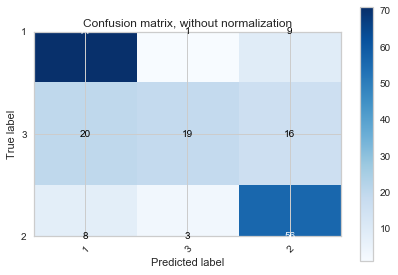

In [654]:
y_pred=grid.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=y,
                      title='Confusion matrix, without normalization')
plt.show()

In [655]:
feature_importances = pd.DataFrame(grid.best_estimator_.feature_importances_,
                                   index = X_train.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_importances.sort_values('importance', ascending=False).head(50)

,feature,importance
42267,Paris,0.051560
25491,paris,0.013846
41315,développeur,0.012639
18576,informatique,0.010170
40337,équipes,0.008215
18804,infrastructure,0.008103
13171,développeur,0.007958
27229,plus 2,0.005029
4587,aws,0.004919
26,1 an,0.004522


In [656]:
print(grid.best_estimator_.score(X_train, y_train) * 100)

100.0


In [657]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.920975,0.084492,0.095194,0.017089,gini,0.05,100,"{'criterion': 'gini', 'max_features': 0.05, 'n...",0.645570,0.656051,0.624204,0.641949,0.013239,10
1,13.655585,0.065503,0.112892,0.004077,gini,0.05,200,"{'criterion': 'gini', 'max_features': 0.05, 'n...",0.658228,0.687898,0.630573,0.658898,0.023383,2
2,17.055740,0.142565,0.114697,0.009390,gini,0.05,250,"{'criterion': 'gini', 'max_features': 0.05, 'n...",0.658228,0.675159,0.624204,0.652542,0.021168,4
3,20.244245,0.230096,0.113154,0.011437,gini,0.05,300,"{'criterion': 'gini', 'max_features': 0.05, 'n...",0.689873,0.675159,0.624204,0.663136,0.028135,1
4,23.308569,0.220011,0.122784,0.007516,gini,0.05,350,"{'criterion': 'gini', 'max_features': 0.05, 'n...",0.683544,0.668790,0.624204,0.658898,0.025224,2
5,7.006076,0.033839,0.081376,0.003420,entropy,0.05,100,"{'criterion': 'entropy', 'max_features': 0.05,...",0.639241,0.656051,0.643312,0.646186,0.007160,7
6,13.382129,0.102033,0.090814,0.005158,entropy,0.05,200,"{'criterion': 'entropy', 'max_features': 0.05,...",0.664557,0.656051,0.624204,0.648305,0.017366,5
7,16.569928,0.256495,0.107634,0.011025,entropy,0.05,250,"{'criterion': 'entropy', 'max_features': 0.05,...",0.670886,0.630573,0.630573,0.644068,0.019024,8
8,18.541327,0.493191,0.084181,0.006948,entropy,0.05,300,"{'criterion': 'entropy', 'max_features': 0.05,...",0.670886,0.643312,0.630573,0.648305,0.016839,5
9,17.549852,1.606528,0.072397,0.003400,entropy,0.05,350,"{'criterion': 'entropy', 'max_features': 0.05,...",0.664557,0.636943,0.630573,0.644068,0.014764,8


- Random Forest Classifier avec PCA

In [658]:
grid.fit(x_train_pca, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(x_test_pca, y_test) * 100 ) )

The best parameters are {'criterion': 'gini', 'max_features': 0.05, 'n_estimators': 350} with a score of 58
Best estimator accuracy on test set 67.00 


In [659]:
print(grid.best_estimator_.score(x_train_pca, y_train) * 100)

100.0


- Adaboost sans PCA

In [660]:
from sklearn.ensemble import AdaBoostClassifier

adclassifier= AdaBoostClassifier()

n_estimators = [15,20,25,30]

param_grid = {'n_estimators': n_estimators}

grid = GridSearchCV(adclassifier, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'n_estimators': 25} with a score of 55
Best estimator accuracy on test set 60.59 


In [661]:
print(grid.best_estimator_.score(X_train, y_train) * 100)

68.00847457627118


Confusion matrix, without normalization
[[58 18  5]
 [16 21 18]
 [ 3 20 44]]


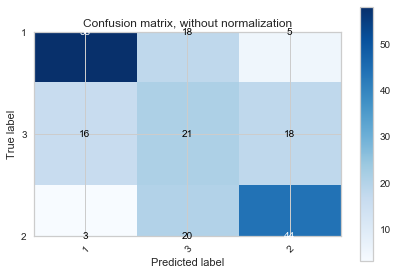

In [662]:
y_pred=grid.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=y,
                      title='Confusion matrix, without normalization')
plt.show()

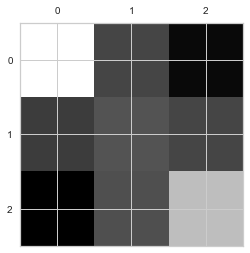

In [663]:
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

- Gradient Boosting classifier

In [664]:
from sklearn.ensemble import GradientBoostingClassifier
    
gbclf = GradientBoostingClassifier()

n_estimators = [25, 50, 75, 100, 125]

param_grid = {'n_estimators': n_estimators}

grid = GridSearchCV(gbclf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(x_train_pca, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(x_test_pca, y_test) * 100 ) )

The best parameters are {'n_estimators': 25} with a score of 57
Best estimator accuracy on test set 67.49 


In [665]:
print(grid.best_estimator_.score(x_train_pca, y_train) * 100)

95.97457627118644


- XGBoost

In [669]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softmax', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

xgb.fit(x_train_pca, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [670]:
xgb.score(x_test_pca, y_test)

0.6699507389162561

In [672]:
xgb.score(x_train_pca, y_train)

0.989406779661017